In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('pima-data.csv')

In [4]:
data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [5]:
data.isnull().any()

num_preg        False
glucose_conc    False
diastolic_bp    False
thickness       False
insulin         False
bmi             False
diab_pred       False
age             False
skin            False
diabetes        False
dtype: bool

<AxesSubplot:>

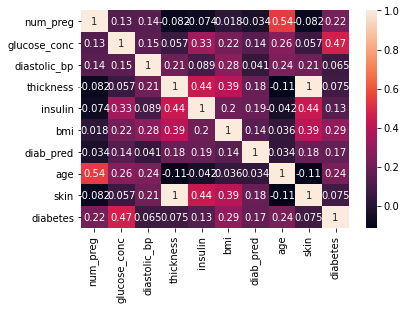

In [10]:
sns.heatmap(data.corr(), annot = True)

In [11]:
# we have to delete skin or thickness, because the correlation of skin and thickness is realated to each other.

In [14]:
del data['skin']

In [15]:
data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [16]:
# Data moulding (In this data our target is diabetes but text format, so we have to convert target var into numeric form)

In [17]:
diabetes_map = {True:1, False:0}
data['diabetes'] = data['diabetes'].map(diabetes_map) 

In [18]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# Store in X and y and then split into train and test dataset

In [30]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [38]:
# Imputting
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values = 0, strategy = 'mean')
X_train =  fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X_train,y_train.ravel())
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classifier.score(X_test,y_test))

[[130  27]
 [ 34  40]]
0.7359307359307359
